In [56]:
import numpy as np
import pandas as pd
from math import factorial
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as scps

%matplotlib inline

In [2]:
def plot_dist(x, dist, title="Distribution of x"):
    """
    Plots the distribution of the x values
    """
    pmf = dist.pmf(x)
    E_x = dist.mean()
    sns.scatterplot(x, pmf)
    plt.axvline(E_x, c='orange', label='E(x)')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Discrete distributions

## Uniform distribution: $X \sim U(a, b)$

$X$ is the random variable that takes on values between $a$ and $b$ with equal probability.

### Probability
$P(X=k)=\frac{1}{b-a+1}\;\textrm{ for } k = a, ..., b$

### Expectation
$E(X) = \frac{a+b}{2}$

### Variance
$V(X) = \frac{(b-a+1)^2 - 1}{12}$

In [3]:
a = 1
b = 6

E_x = (a + b) / 2

k = np.arange(a, b+1)
pmf = np.ones_like(k) / (b - a + 1)

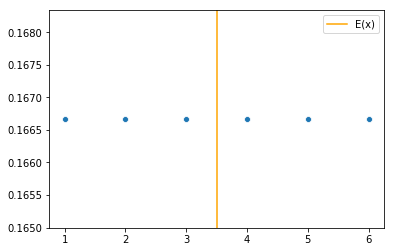

In [4]:
plt.axvline(E_x, c='orange', label='E(x)')
plt.legend()
sns.scatterplot(k, pmf);

## Binomial distribution: $X \sim B(n, p)$

$X$ is the random variable that counts the number of successes from $n$ independent attempts with the same chance for success $p$.

### Probability
$P(X=k)={n \choose k} p^k (1-p)^{n-k}\;\textrm{ for } k = 0, 1, 2, ..., n$

### Expectation
$E(X) = np$

### Variance
$V(X) = np(1-p)$

In [5]:
from scipy.stats import binom

True
True


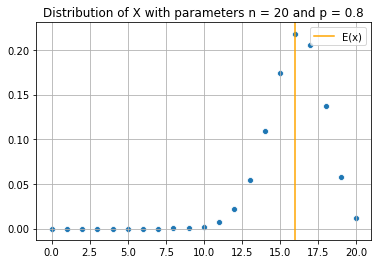

In [35]:
n = 20
p = 0.8

dist = binom(n, p)

title = f"Distribution of X with parameters n = {n} and p = {p}"

E_x = n * p
V_x = n * p * (1 - p)

print(E_x == dist.mean())
print(V_x == dist.var())


k = np.arange(n+1)

plot_dist(k, binom(n, p), title)

True
True


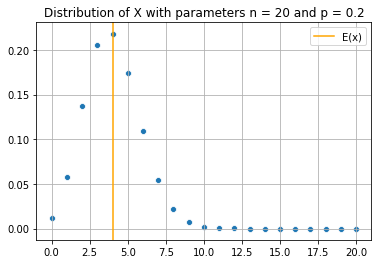

In [36]:
n = 20
p = 0.2
dist = binom(n, p)
title = f"Distribution of X with parameters n = {n} and p = {p}"

E_x = n * p
V_x = n * p * (1 - p)

print(E_x == dist.mean())
print(V_x == dist.var())

k = np.arange(n+1)

plot_dist(k, dist, title)

True
True


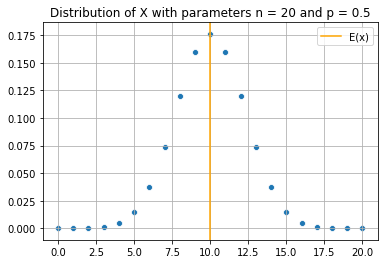

In [38]:
n = 20
p = 0.5

dist = binom(n, p)
title = f"Distribution of X with parameters n = {n} and p = {p}"

E_x = n * p
V_x = n * p * (1 - p)

print(E_x == dist.mean())
print(V_x == dist.var())

k = np.arange(n+1)
plot_dist(k, dist, title)

## Hypergeometric distribution: $X \sim HG(M, n, N)$

$X$ is the random variable that counts the number of specials taken from choosing $N$ times without returning from a finite population of size $M$ which has $n$ specials.

### Probability
$P(X=k)=\frac{{n \choose k}{M-n \choose N-k}}{M \choose N} \;\textrm{ for } k =\textrm{max}(0,N-(M-n)),...,\textrm{min}(N, n)$

### Expectation
$E(X) = N\frac{n}{M}$

### Variance
$V(X) = \frac{M-N}{M-1}N\frac{n}{M}(1 - \frac{n}{M})$

In [9]:
from scipy.stats import hypergeom

True
True


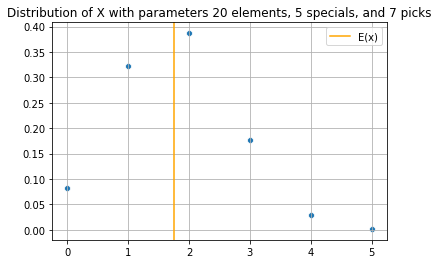

In [63]:
M, n, N = 20, 5, 7

dist = hypergeom(M, n, N)

title = f"Distribution of X with parameters {M} elements, {n} specials, and {N} picks"

E_x = np.round(N * n / M, decimals=3)
V_x = np.round(((M-N)/(M-1)) * N * (n/M) * (1 - (n/M)), decimals=3)

print(E_x == np.round(dist.mean(), decimals=3))
print(V_x == np.round(dist.var(), decimals=3))

k_lower = max(0, N-M+n)
k_upper = min(n, N)
k = np.arange(k_lower, k_upper+1)

plot_dist(k, dist, title)

True
True


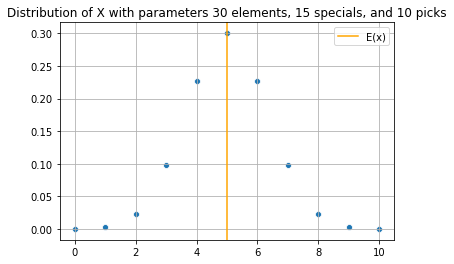

In [64]:
M, n, N = 30, 15, 10
dist = hypergeom(M, n, N)

title = f"Distribution of X with parameters {M} elements, {n} specials, and {N} picks"

E_x = np.round(N * n / M, decimals=3)
V_x = np.round(((M-N)/(M-1)) * N * (n/M) * (1 - (n/M)), decimals=3)

print(E_x == np.round(dist.mean(), decimals=3))
print(V_x == np.round(dist.var(), decimals=3))

k_lower = max(0, N - M + n)
k_upper = min(n, N)
k = np.arange(k_lower, k_upper+1)

plot_dist(k, dist, title)

True
True


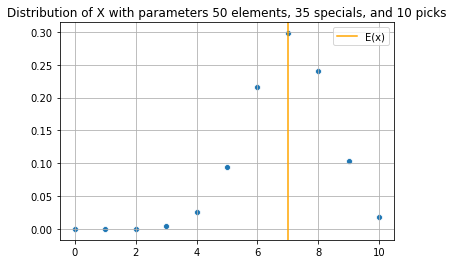

In [65]:
M, n, N = 50, 35, 10

dist = hypergeom(M, n, N)
title = f"Distribution of X with parameters {M} elements, {n} specials, and {N} picks"

E_x = np.round(N * n / M, decimals=3)
V_x = np.round(((M-N)/(M-1)) * N * (n/M) * (1 - (n/M)), decimals=3)

print(E_x == np.round(dist.mean(), decimals=3))
print(V_x == np.round(dist.var(), decimals=3))

k_lower = max(0, N - M + n)
k_upper = min(n, N)
k = np.arange(k_lower, k_upper+1)

plot_dist(k, dist, title)

## Geometric distribution: $X \sim G(p)$

$X$ is the random variable that counts the number of attempts up until and including the first success in an independent series of attempts with the same chance for success $p$.

### Probability
$P(X=k)=(1-p)^{k-1}p\;\textrm{ for } k = 1, 2, ...$

### Expectation
$E(X) = \frac{1}{p}$

### Variance
$V(X) = \frac{1-p}{p^2}$

In [13]:
from scipy.stats import geom

True
True


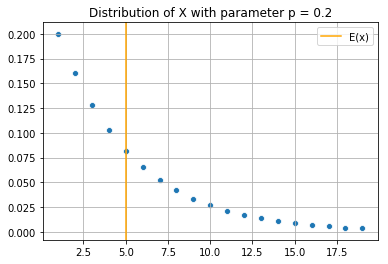

In [68]:
p = 0.2
dist = geom(p)

title = f"Distribution of X with parameter p = {p}"

E_x = np.round(1 / p, decimals=3)
V_x = np.round((1 - p) / p**2, decimals=3)

print(E_x == np.round(dist.mean(), decimals=3))
print(V_x == np.round(dist.var(), decimals=3))

k = np.arange(1, 20)
plot_dist(k, dist, title)

True
True


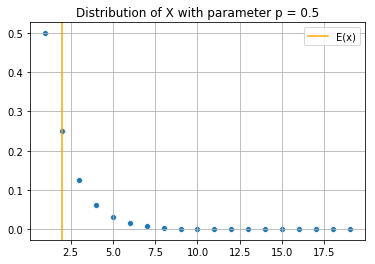

In [72]:
p = 0.5

dist = geom(p)

title = f"Distribution of X with parameter p = {p}"

E_x = np.round(1 / p, decimals=3)
V_x = np.round((1 - p) / p**2, decimals=3)

print(E_x == np.round(dist.mean(), decimals=3))
print(V_x == np.round(dist.var(), decimals=3))

k = np.arange(1, 20)
plot_dist(k, dist, title)

True
True


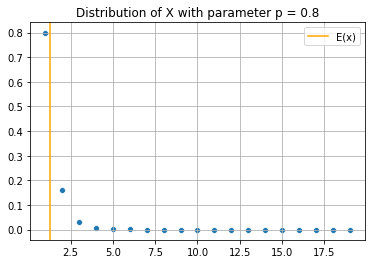

In [71]:
p = 0.8

dist = geom(p)

title = f"Distribution of X with parameter p = {p}"

E_x = np.round(1 / p, decimals=3)
V_x = np.round((1 - p) / p**2, decimals=3)

print(E_x == np.round(dist.mean(), decimals=3))
print(V_x == np.round(dist.var(), decimals=3))

k = np.arange(1, 20)
plot_dist(k, dist, title)

## Negative binomial distribution: $X \sim NB(n,p)$

$X$ is the random variable that counts the number of attempts up until and including the $n^{th}$ success, in an independent series of attempts with the same chance for success $p$.

### Probability
$P(X=k)={k-1 \choose n-1} p^n (1-p)^{k-n} \;\textrm{ for } k = n, n+1, ...$

### Expectation
$E(X) = \frac{n}{p}$

### Variance
$V(X) = n\frac{1-p}{p^2}$

In [17]:
from scipy.stats import nbinom

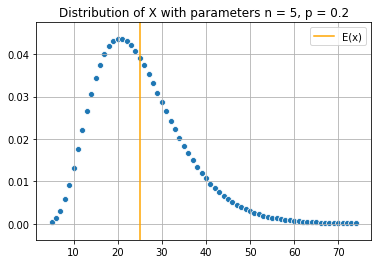

In [18]:
n = 5
p = 0.2

k = np.arange(n, n+70)

title = f"Distribution of X with parameters n = {n}, p = {p}"
plot_dist(k, nbinom(n, p, loc=n), title)

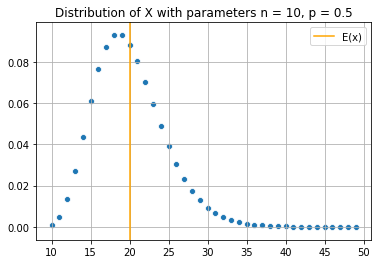

In [19]:
n = 10
p = 0.5

k = np.arange(n, n+40)

title = f"Distribution of X with parameters n = {n}, p = {p}"
plot_dist(k, nbinom(n, p, loc=n), title)

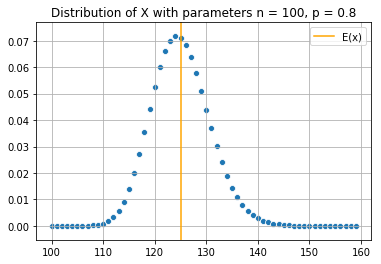

In [20]:
n = 100
p = 0.8

k = np.arange(n, n+60)

title = f"Distribution of X with parameters n = {n}, p = {p}"
plot_dist(k, nbinom(n, p, loc=n), title)

### Poisson distribution: $X \sim P(\lambda)$

$X$ is the random variable that counts the number of appearances in a unit that come at a rate of $\lambda$ per unit, independently from each other.

### Probability
$P(X=k) = e^{-\lambda}\frac{\lambda^k}{k!} \;\textrm{ for } k = 0, 1, 2, ...$

### Expectation
$E(X) = \lambda$

### Variance
$V(X) = \lambda$

In [21]:
from scipy.stats import poisson

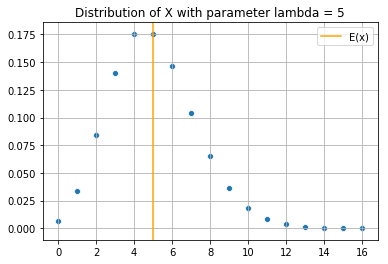

In [24]:
lam = 5

k = np.arange(17)

title = f"Distribution of X with parameter lambda = {lam}"
plot_dist(k, poisson(lam,), title)

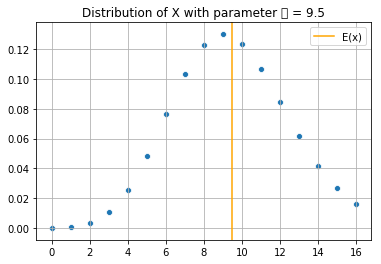

In [25]:
lam = 9.5

k = np.arange(17)

title = f"Distribution of X with parameter 𝜆 = {lam}"
plot_dist(k, poisson(lam,), title)